<a href="https://colab.research.google.com/github/estefanialopeez/Actividad_3/blob/main/Actividad_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from numpy.lib.function_base import quantile


In [ ]:
#cargar archivo csv desde el equipo
from google.colab import files
files.upload()

In [3]:
df=pd.read_csv('Ventas_sin_nulos.csv')
df.head()

,Unnamed: 0,indice_tiempo,ventas_precios_corrientes,ventas_precios_constantes,ventas_totales_canal_venta,salon_ventas,canales_on_line,ventas_totales_medio_pago,efectivo,tarjetas_debito,...,almacen,panaderia,lacteos,carnes,verduleria_fruteria,alimentos_preparados_rotiseria,articulos_limpieza_perfumeria,indumentaria_calzado_textiles_hogar,electronicos_articulos_hogar,otros
0,0,01/01/2017,27858.9,27477.3,27858872.08,27591730.13,267141.956,27858872.08,1.023010e+07,6864575.384,...,6705475.318,9.459063e+05,2880656.169,2606192.942,1.050314e+06,340777.3882,4397543.671,772371.8476,1838507.096,2806660.309
1,1,01/02/2017,25994.2,25223.4,25994200.17,25749179.40,245020.769,25994200.17,9.719067e+06,6438494.011,...,6576624.803,9.256186e+05,2855639.900,2600083.591,1.026167e+06,328288.6951,4053283.771,672290.5165,1257661.903,2354084.901
2,2,01/03/2017,27780.0,26334.3,27780006.52,27472228.72,307777.804,27780006.52,1.024444e+07,6908522.962,...,7437264.174,1.016148e+06,3188259.169,2824976.726,1.075526e+06,353335.1548,4354197.611,667696.6653,1305674.917,2266189.277
3,3,01/04/2017,29134.3,27045.9,29134272.22,28827479.49,306792.733,29134272.22,1.031263e+07,7454251.800,...,8211244.093,1.132396e+06,3257140.159,3006158.760,1.037213e+06,359694.4537,4355706.646,838948.2458,1535726.345,2146755.887
4,4,01/05/2017,27969.0,25631.9,27969004.68,27569311.41,399693.262,27969004.68,1.014761e+07,6735747.319,...,7651058.084,1.033082e+06,3232635.767,2799142.123,9.826512e+05,336568.0085,4206101.605,915895.1498,1824462.036,2117971.483


In [4]:
#supervisar que no hay nulos
nulos=df.isnull().sum()
nulos

Unnamed: 0                             0
indice_tiempo                          0
ventas_precios_corrientes              0
ventas_precios_constantes              0
ventas_totales_canal_venta             0
salon_ventas                           0
canales_on_line                        0
ventas_totales_medio_pago              0
efectivo                               0
tarjetas_debito                        0
tarjetas_credito                       0
otros_medios                           0
ventas_totales_grupo_articulos         0
subtotal_ventas_alimentos_bebidas      0
bebidas                                0
almacen                                0
panaderia                              0
lacteos                                0
carnes                                 0
verduleria_fruteria                    0
alimentos_preparados_rotiseria         0
articulos_limpieza_perfumeria          0
indumentaria_calzado_textiles_hogar    0
electronicos_articulos_hogar           0
otros           

##ventas_precios_corrientes

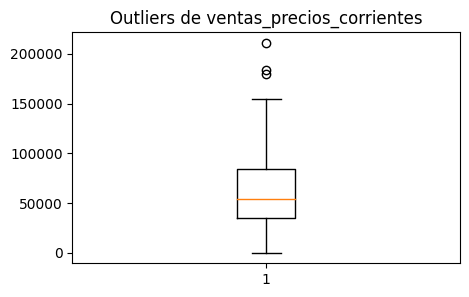

In [18]:
fig=plt.figure(figsize=(5,3))
plt.boxplot(df['ventas_precios_corrientes'])
plt.title('Outliers de ventas_precios_corrientes')
plt.show()

In [39]:
#metodo de la dsvest para encontrar los valores extremos

y = df['ventas_precios_corrientes']

limite_superior= y.mean()+3*y.std()
limite_inferior= y.mean()-3*y.std()

print('Limite superiior:', limite_superior)
print('Limite inferior:', limite_inferior)

#encontrar los ouliers

outliers= df[(y>limite_superior)|(y<limite_inferior)]  #fila 42
outliers


#datos limpios

df_clean_VentaCorrientes=df[(y<=limite_superior)&(y>=limite_inferior)]  #convierte valores extremos en nulos
df_clean_VentaCorrientes.head()   #elimin la fila 42


Limite superiior: 207054.02471416624
Limite inferior: -68093.96030738654


,Unnamed: 0,indice_tiempo,ventas_precios_corrientes,ventas_precios_constantes,ventas_totales_canal_venta,salon_ventas,canales_on_line,ventas_totales_medio_pago,efectivo,tarjetas_debito,...,almacen,panaderia,lacteos,carnes,verduleria_fruteria,alimentos_preparados_rotiseria,articulos_limpieza_perfumeria,indumentaria_calzado_textiles_hogar,electronicos_articulos_hogar,otros
0,0,01/01/2017,27858.9,27477.3,27858872.08,27591730.13,267141.956,27858872.08,1.023010e+07,6864575.384,...,6705475.318,9.459063e+05,2880656.169,2606192.942,1.050314e+06,340777.3882,4397543.671,772371.8476,1838507.096,2806660.309
1,1,01/02/2017,25994.2,25223.4,25994200.17,25749179.40,245020.769,25994200.17,9.719067e+06,6438494.011,...,6576624.803,9.256186e+05,2855639.900,2600083.591,1.026167e+06,328288.6951,4053283.771,672290.5165,1257661.903,2354084.901
2,2,01/03/2017,27780.0,26334.3,27780006.52,27472228.72,307777.804,27780006.52,1.024444e+07,6908522.962,...,7437264.174,1.016148e+06,3188259.169,2824976.726,1.075526e+06,353335.1548,4354197.611,667696.6653,1305674.917,2266189.277
3,3,01/04/2017,29134.3,27045.9,29134272.22,28827479.49,306792.733,29134272.22,1.031263e+07,7454251.800,...,8211244.093,1.132396e+06,3257140.159,3006158.760,1.037213e+06,359694.4537,4355706.646,838948.2458,1535726.345,2146755.887
4,4,01/05/2017,27969.0,25631.9,27969004.68,27569311.41,399693.262,27969004.68,1.014761e+07,6735747.319,...,7651058.084,1.033082e+06,3232635.767,2799142.123,9.826512e+05,336568.0085,4206101.605,915895.1498,1824462.036,2117971.483


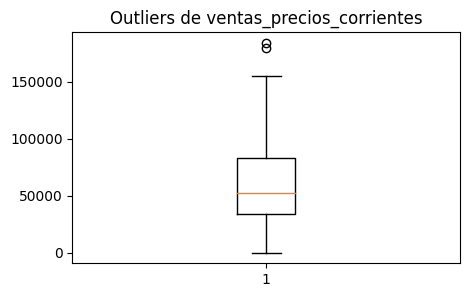

In [37]:
#se usa el df en el que se aplico el metodo de desviacion estandar
fig=plt.figure(figsize=(5,3))
plt.boxplot(df_clean_VentaCorrientes['ventas_precios_corrientes'])
plt.title('Outliers de ventas_precios_corrientes')
plt.show()

In [51]:
df_clean_VentaCorrientes.to_csv('ventas_precios_corrientes.csv')

from google.colab import files
files.download('ventas_precios_corrientes.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

##ventas_totales_canal_venta

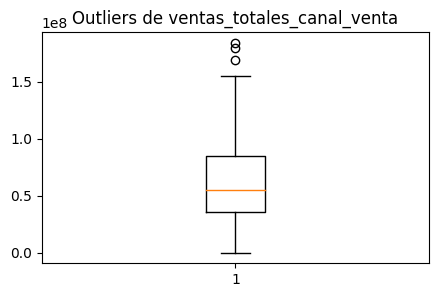

In [19]:
fig=plt.figure(figsize=(5,3))
plt.boxplot(df['ventas_totales_canal_venta'])
plt.title('Outliers de ventas_totales_canal_venta')
plt.show()

In [59]:
#metodo IQR
y =df['ventas_totales_canal_venta']

percentile25=y.quantile(.25)   #Q1
percentile75=y.quantile(.75)   #Q3
iqr= percentile75-percentile25

Limite_superior_iqr = percentile75 +1.5*iqr
Limite_inferior_iqr = percentile25 +1.5*iqr

print('El limite superior permitido es:' ,Limite_superior_iqr)
print('El limite inferior permitido es:' ,Limite_inferior_iqr)

outliers_iqr_ventascanal= df[(y>Limite_superior_iqr)|(y<Limite_inferior_iqr)]
outliers_iqr_ventascanal.head()
df_clean_iqr_ventascanal=df[(y<=Limite_superior_iqr)&(y>=Limite_inferior_iqr)]  #convierte valores extremos en nulos
df_clean_iqr_ventascanal.head()

El limite superior permitido es: 157880015.935
El limite inferior permitido es: 109060897.105


,Unnamed: 0,indice_tiempo,ventas_precios_corrientes,ventas_precios_constantes,ventas_totales_canal_venta,salon_ventas,canales_on_line,ventas_totales_medio_pago,efectivo,tarjetas_debito,...,almacen,panaderia,lacteos,carnes,verduleria_fruteria,alimentos_preparados_rotiseria,articulos_limpieza_perfumeria,indumentaria_calzado_textiles_hogar,electronicos_articulos_hogar,otros
45,47,01/12/2020,115806.1,29931.1,115806128.1,111830218.6,3975909.551,115806128.1,36284788.05,31300615.02,...,29052388.41,3568526.302,10374402.29,13502805.48,4262746.600,8.814768e+05,14197119.00,3022975.198,7711912.075,1.023091e+07
48,52,01/05/2021,110604.7,23368.4,110604694.6,104997658.2,5607036.330,110604694.6,33391018.41,29448299.39,...,31328427.63,3801495.080,13116541.51,14204902.67,3924175.620,8.922634e+05,14517188.31,2686103.389,7849584.393,7.525721e+06
49,53,01/06/2021,116287.9,23678.0,116287893.0,111477594.5,4810298.410,116287893.0,34735136.74,32637663.36,...,32622021.61,3921981.953,13537963.96,14134807.88,3748454.174,9.146226e+05,14484893.56,3640081.868,9514178.631,8.024885e+06
50,54,01/07/2021,125658.6,24779.5,125658552.5,120904098.3,4754454.215,125658552.5,37973547.56,37146178.90,...,34683058.37,4322896.980,14292062.10,15147184.63,3985101.607,1.052053e+06,15724007.71,4051857.507,9222787.620,9.421771e+06
51,56,01/09/2021,123002.3,22962.0,123002252.4,118585472.2,4416780.259,123002252.4,38080750.86,34575381.28,...,34298836.96,4333686.607,14489891.67,14721979.89,4184266.093,1.103824e+06,16336755.11,2805934.305,7977185.494,8.585647e+06


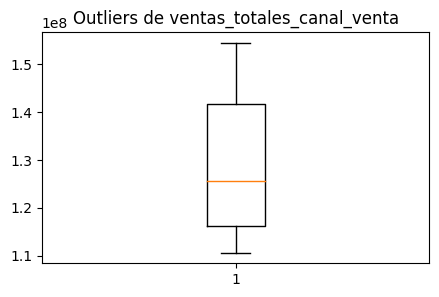

In [50]:
#se usa el df clean en el que se aplico el metodo IQR
fig=plt.figure(figsize=(5,3))
plt.boxplot(df_clean_iqr_ventascanal['ventas_totales_canal_venta'])
plt.title('Outliers de ventas_totales_canal_venta')
plt.show()

In [52]:
df_clean_iqr_ventascanal.to_csv('ventas_totales_canal_venta.csv')

from google.colab import files
files.download('ventas_totales_canal_venta.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

##ventas_totales_grupo_articulos

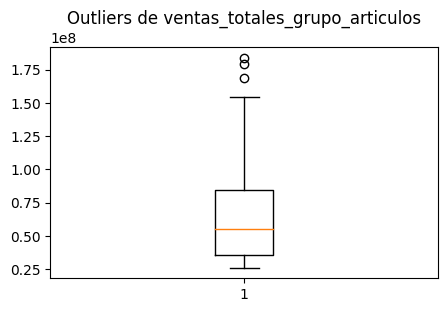

In [20]:
fig=plt.figure(figsize=(5,3))
plt.boxplot(df['ventas_totales_grupo_articulos'])
plt.title('Outliers de ventas_totales_grupo_articulos')
plt.show()

In [54]:
#metodo de la dsvest para encontrar los valores extremos

y = df['ventas_totales_grupo_articulos']

limite_superior= y.mean()+3*y.std()
limite_inferior= y.mean()-3*y.std()

print('Limite superiior:', limite_superior)
print('Limite inferior:', limite_inferior)

#encontrar los ouliers

outliers_VentasTot_articulos= df[(y>limite_superior)|(y<limite_inferior)]
outliers_VentasTot_articulos   #no encuentra datos atipicos usando este metodo


#datos limpios

df_clean_VentasTot_articulos=df[(y<=limite_superior)&(y>=limite_inferior)]  #convierte valores extremos en nulos
df_clean_VentasTot_articulos.head()

Limite superiior: 199048697.08499014
Limite inferior: -58767748.05482064


,Unnamed: 0,indice_tiempo,ventas_precios_corrientes,ventas_precios_constantes,ventas_totales_canal_venta,salon_ventas,canales_on_line,ventas_totales_medio_pago,efectivo,tarjetas_debito,...,almacen,panaderia,lacteos,carnes,verduleria_fruteria,alimentos_preparados_rotiseria,articulos_limpieza_perfumeria,indumentaria_calzado_textiles_hogar,electronicos_articulos_hogar,otros


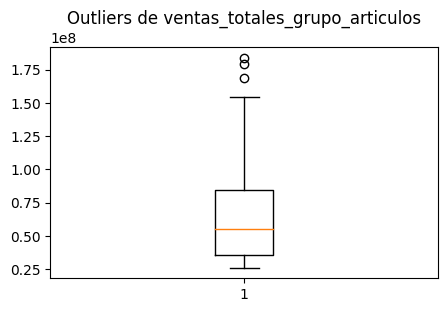

In [56]:
fig=plt.figure(figsize=(5,3))
plt.boxplot(df_clean_VentasTot_articulos['ventas_totales_grupo_articulos'])
plt.title('Outliers de ventas_totales_grupo_articulos')
plt.show()

In [57]:
df_clean_VentasTot_articulos.to_csv('ventas_totales_grupo_articulos.csv')

from google.colab import files
files.download('ventas_totales_grupo_articulos.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

##subtotal_ventas_alimentos_bebidas

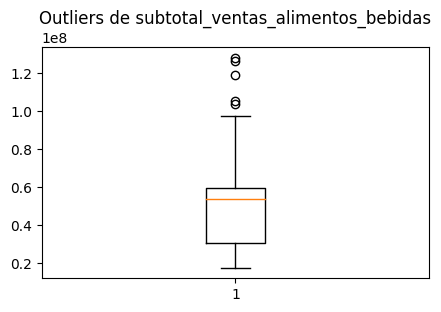

In [22]:
fig=plt.figure(figsize=(5,3))
plt.boxplot(df['subtotal_ventas_alimentos_bebidas'])
plt.title('Outliers de subtotal_ventas_alimentos_bebidas')
plt.show()

In [66]:
#metodo IQR
y =df['subtotal_ventas_alimentos_bebidas']

percentile25=y.quantile(.25)   #Q1
percentile75=y.quantile(.75)   #Q3
iqr= percentile75-percentile25

Limite_superior_iqr = percentile75 +1.5*iqr
Limite_inferior_iqr = percentile25 +1.5*iqr

print('El limite superior permitido es:' ,Limite_superior_iqr)
print('El limite inferior permitido es:' ,Limite_inferior_iqr)

outliers_iqr_ventasalimentosbebidas= df[(y>Limite_superior_iqr)|(y<Limite_inferior_iqr)]
outliers_iqr_ventasalimentosbebidas.head()
df_clean_iqr_ventasalimentosbebidas=df[(y<=Limite_superior_iqr)&(y>=Limite_inferior_iqr)]  #convierte valores extremos en nulos


El limite superior permitido es: 102920560.37250002
El limite inferior permitido es: 73994822.5275


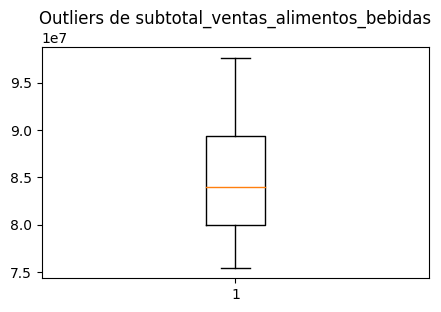

In [64]:
#se usa el df clean en el que se aplico el metodo IQR
fig=plt.figure(figsize=(5,3))
plt.boxplot(df_clean_iqr_ventasalimentosbebidas['subtotal_ventas_alimentos_bebidas'])
plt.title('Outliers de subtotal_ventas_alimentos_bebidas')
plt.show()

In [67]:
df_clean_iqr_ventasalimentosbebidas.to_csv('subtotal_ventas_alimentos_bebidas.csv')

from google.colab import files
files.download('subtotal_ventas_alimentos_bebidas.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

##bebidas

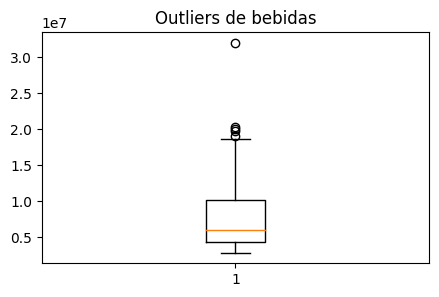

In [23]:
fig=plt.figure(figsize=(5,3))
plt.boxplot(df['bebidas'])
plt.title('Outliers de bebidas')
plt.show()

In [68]:
#metodo de la dsvest para encontrar los valores extremos

y = df['bebidas']

limite_superior= y.mean()+3*y.std()
limite_inferior= y.mean()-3*y.std()

print('Limite superiior:', limite_superior)
print('Limite inferior:', limite_inferior)

#encontrar los ouliers

outliers_bebidas= df[(y>limite_superior)|(y<limite_inferior)]
outliers_bebidas

#datos limpios

df_clean_bebidas=df[(y<=limite_superior)&(y>=limite_inferior)]  #convierte valores extremos en nulos
df_clean_bebidas.head()

Limite superiior: 26117394.140479844
Limite inferior: -9183478.973632384


,Unnamed: 0,indice_tiempo,ventas_precios_corrientes,ventas_precios_constantes,ventas_totales_canal_venta,salon_ventas,canales_on_line,ventas_totales_medio_pago,efectivo,tarjetas_debito,...,almacen,panaderia,lacteos,carnes,verduleria_fruteria,alimentos_preparados_rotiseria,articulos_limpieza_perfumeria,indumentaria_calzado_textiles_hogar,electronicos_articulos_hogar,otros
0,0,01/01/2017,27858.9,27477.3,27858872.08,27591730.13,267141.956,27858872.08,1.023010e+07,6864575.384,...,6705475.318,9.459063e+05,2880656.169,2606192.942,1.050314e+06,340777.3882,4397543.671,772371.8476,1838507.096,2806660.309
1,1,01/02/2017,25994.2,25223.4,25994200.17,25749179.40,245020.769,25994200.17,9.719067e+06,6438494.011,...,6576624.803,9.256186e+05,2855639.900,2600083.591,1.026167e+06,328288.6951,4053283.771,672290.5165,1257661.903,2354084.901
2,2,01/03/2017,27780.0,26334.3,27780006.52,27472228.72,307777.804,27780006.52,1.024444e+07,6908522.962,...,7437264.174,1.016148e+06,3188259.169,2824976.726,1.075526e+06,353335.1548,4354197.611,667696.6653,1305674.917,2266189.277
3,3,01/04/2017,29134.3,27045.9,29134272.22,28827479.49,306792.733,29134272.22,1.031263e+07,7454251.800,...,8211244.093,1.132396e+06,3257140.159,3006158.760,1.037213e+06,359694.4537,4355706.646,838948.2458,1535726.345,2146755.887
4,4,01/05/2017,27969.0,25631.9,27969004.68,27569311.41,399693.262,27969004.68,1.014761e+07,6735747.319,...,7651058.084,1.033082e+06,3232635.767,2799142.123,9.826512e+05,336568.0085,4206101.605,915895.1498,1824462.036,2117971.483


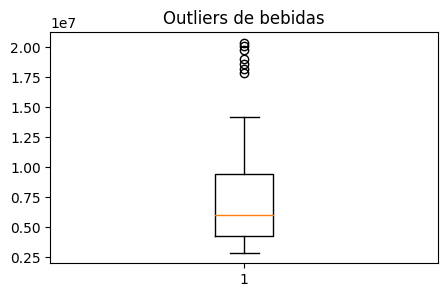

In [69]:
fig=plt.figure(figsize=(5,3))
plt.boxplot(df_clean_bebidas['bebidas'])
plt.title('Outliers de bebidas')
plt.show()

In [70]:
df_clean_bebidas.to_csv('bebidas.csv')

from google.colab import files
files.download('bebidas.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

##almacen

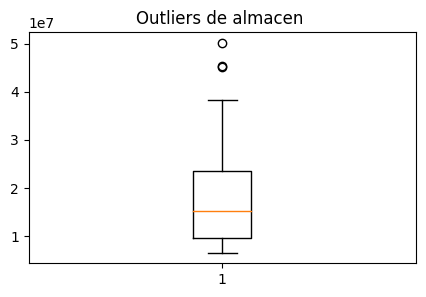

In [29]:
fig=plt.figure(figsize=(5,3))
plt.boxplot(df['almacen'])
plt.title('Outliers de almacen ')
plt.show()

In [72]:
#metodo de la dsvest para encontrar los valores extremos

y = df['almacen']

limite_superior= y.mean()+3*y.std()
limite_inferior= y.mean()-3*y.std()

print('Limite superiior:', limite_superior)
print('Limite inferior:', limite_inferior)

#encontrar los ouliers

outliers_almacen= df[(y>limite_superior)|(y<limite_inferior)]
outliers_almacen   #no encuentra datos atipicos usando este metodo


#datos limpios

df_clean_almacen=df[(y<=limite_superior)&(y>=limite_inferior)]  #convierte valores extremos en nulos

Limite superiior: 52694951.27372408
Limite inferior: -15070454.255724076


,Unnamed: 0,indice_tiempo,ventas_precios_corrientes,ventas_precios_constantes,ventas_totales_canal_venta,salon_ventas,canales_on_line,ventas_totales_medio_pago,efectivo,tarjetas_debito,...,almacen,panaderia,lacteos,carnes,verduleria_fruteria,alimentos_preparados_rotiseria,articulos_limpieza_perfumeria,indumentaria_calzado_textiles_hogar,electronicos_articulos_hogar,otros


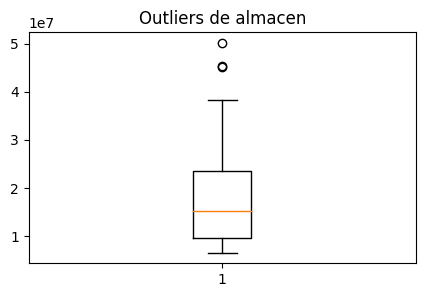

In [73]:
fig=plt.figure(figsize=(5,3))
plt.boxplot(df_clean_almacen['almacen'])
plt.title('Outliers de almacen')
plt.show()

In [76]:
df_clean_almacen.to_csv('almacen.csv')

from google.colab import files
files.download('almacen.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

##Lacteos

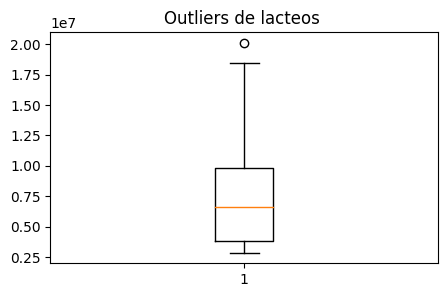

In [25]:
fig=plt.figure(figsize=(5,3))
plt.boxplot(df['lacteos'])
plt.title('Outliers de lacteos ')
plt.show()

In [79]:
#metodo de la dsvest para encontrar los valores extremos

y = df['lacteos']

limite_superior= y.mean()+3*y.std()
limite_inferior= y.mean()-3*y.std()

print('Limite superiior:', limite_superior)
print('Limite inferior:', limite_inferior)

#encontrar los ouliers

outliers_lacteos= df[(y>limite_superior)|(y<limite_inferior)]
outliers_lacteos

#datos limpios

df_clean_lacteos=df[(y<=limite_superior)&(y>=limite_inferior)]  #convierte valores extremos en nulos
df_clean_lacteos.head()

Limite superiior: 21448846.687430874
Limite inferior: -5913913.463769854


,Unnamed: 0,indice_tiempo,ventas_precios_corrientes,ventas_precios_constantes,ventas_totales_canal_venta,salon_ventas,canales_on_line,ventas_totales_medio_pago,efectivo,tarjetas_debito,...,almacen,panaderia,lacteos,carnes,verduleria_fruteria,alimentos_preparados_rotiseria,articulos_limpieza_perfumeria,indumentaria_calzado_textiles_hogar,electronicos_articulos_hogar,otros
0,0,01/01/2017,27858.9,27477.3,27858872.08,27591730.13,267141.956,27858872.08,1.023010e+07,6864575.384,...,6705475.318,9.459063e+05,2880656.169,2606192.942,1.050314e+06,340777.3882,4397543.671,772371.8476,1838507.096,2806660.309
1,1,01/02/2017,25994.2,25223.4,25994200.17,25749179.40,245020.769,25994200.17,9.719067e+06,6438494.011,...,6576624.803,9.256186e+05,2855639.900,2600083.591,1.026167e+06,328288.6951,4053283.771,672290.5165,1257661.903,2354084.901
2,2,01/03/2017,27780.0,26334.3,27780006.52,27472228.72,307777.804,27780006.52,1.024444e+07,6908522.962,...,7437264.174,1.016148e+06,3188259.169,2824976.726,1.075526e+06,353335.1548,4354197.611,667696.6653,1305674.917,2266189.277
3,3,01/04/2017,29134.3,27045.9,29134272.22,28827479.49,306792.733,29134272.22,1.031263e+07,7454251.800,...,8211244.093,1.132396e+06,3257140.159,3006158.760,1.037213e+06,359694.4537,4355706.646,838948.2458,1535726.345,2146755.887
4,4,01/05/2017,27969.0,25631.9,27969004.68,27569311.41,399693.262,27969004.68,1.014761e+07,6735747.319,...,7651058.084,1.033082e+06,3232635.767,2799142.123,9.826512e+05,336568.0085,4206101.605,915895.1498,1824462.036,2117971.483


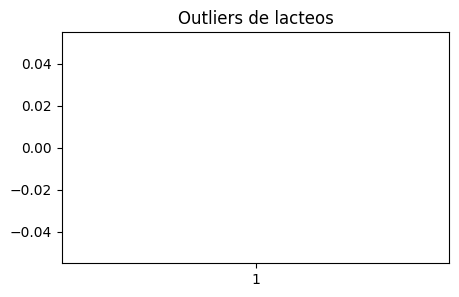

In [83]:
fig=plt.figure(figsize=(5,3))
plt.boxplot(outliers_lacteos['lacteos'])
plt.title('Outliers de lacteos')
plt.show()

In [84]:
outliers_lacteos.to_csv('lacteos.csv')

from google.colab import files
files.download('lacteos.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

##alimentos_preparados_rotiseria

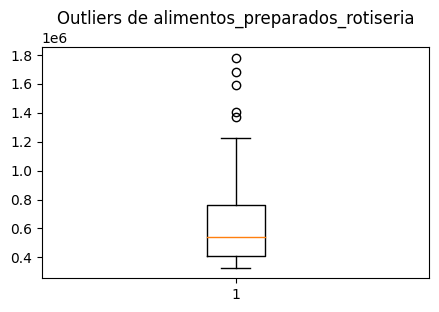

In [26]:
fig=plt.figure(figsize=(5,3))
plt.boxplot(df['alimentos_preparados_rotiseria'])
plt.title('Outliers de alimentos_preparados_rotiseria')
plt.show()

In [86]:
#metodo IQR
y =df['alimentos_preparados_rotiseria']

percentile25=y.quantile(.25)   #Q1
percentile75=y.quantile(.75)   #Q3
iqr= percentile75-percentile25

Limite_superior_iqr = percentile75 +1.5*iqr
Limite_inferior_iqr = percentile25 +1.5*iqr

print('El limite superior permitido es:' ,Limite_superior_iqr)
print('El limite inferior permitido es:' ,Limite_inferior_iqr)

outliers_iqr_rosriceria= df[(y>Limite_superior_iqr)|(y<Limite_inferior_iqr)]
outliers_iqr_rosriceria.head()
df_clean_iqr_rosticeria=df[(y<=Limite_superior_iqr)&(y>=Limite_inferior_iqr)]  #convierte valores extremos en nulos
df_clean_iqr_rosticeria

El limite superior permitido es: 1299786.294175
El limite inferior permitido es: 942477.203725


,Unnamed: 0,indice_tiempo,ventas_precios_corrientes,ventas_precios_constantes,ventas_totales_canal_venta,salon_ventas,canales_on_line,ventas_totales_medio_pago,efectivo,tarjetas_debito,...,almacen,panaderia,lacteos,carnes,verduleria_fruteria,alimentos_preparados_rotiseria,articulos_limpieza_perfumeria,indumentaria_calzado_textiles_hogar,electronicos_articulos_hogar,otros
50,54,01/07/2021,125658.6,24779.5,125658552.5,120904098.3,4754454.215,125658552.5,37973547.56,37146178.90,...,34683058.37,4322896.980,14292062.10,15147184.63,3985101.607,1052052.786,15724007.71,4051857.507,9.222788e+06,9.421771e+06
51,56,01/09/2021,123002.3,22962.0,123002252.4,118585472.2,4416780.259,123002252.4,38080750.86,34575381.28,...,34298836.96,4333686.607,14489891.67,14721979.89,4184266.093,1103823.945,16336755.11,2805934.305,7.977185e+06,8.585647e+06
52,57,01/10/2021,140487.5,25386.7,140487487.3,136000643.3,4486843.920,140487487.3,43323345.69,39697514.99,...,37081602.26,4773476.075,15561032.00,16349404.55,4785226.402,1226503.662,18501724.82,3328328.421,1.091989e+07,1.012184e+07
53,58,01/11/2021,141702.0,25026.6,141701960.7,135950778.8,5751181.809,141701960.7,43762928.15,39925207.45,...,36354580.02,4509964.850,14720418.14,15761449.15,4869397.981,1213625.230,18664160.82,3209173.083,1.275437e+07,1.146439e+07


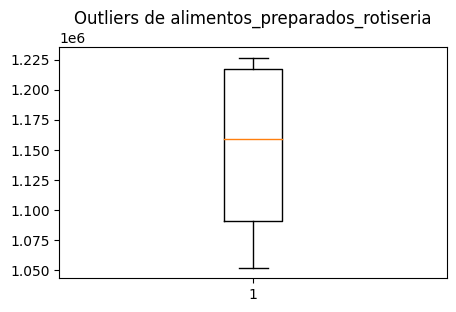

In [87]:
#se usa el df clean en el que se aplico el metodo IQR
fig=plt.figure(figsize=(5,3))
plt.boxplot(df_clean_iqr_rosticeria['alimentos_preparados_rotiseria'])
plt.title('Outliers de alimentos_preparados_rotiseria')
plt.show()

In [88]:
df_clean_iqr_rosticeria.to_csv('alimentos_preparados_rotiseria.csv')

from google.colab import files
files.download('alimentos_preparados_rotiseria.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

##articulos_limpieza_perfumeria

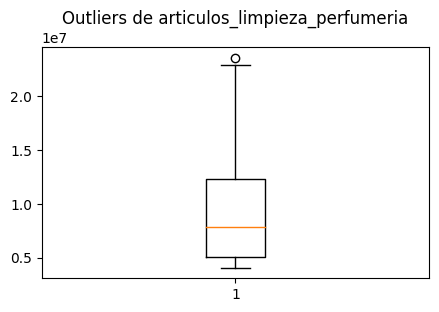

In [27]:
fig=plt.figure(figsize=(5,3))
plt.boxplot(df['articulos_limpieza_perfumeria'])
plt.title('Outliers de articulos_limpieza_perfumeria')
plt.show()

In [89]:
#metodo IQR
y =df['articulos_limpieza_perfumeria']

percentile25=y.quantile(.25)   #Q1
percentile75=y.quantile(.75)   #Q3
iqr= percentile75-percentile25

Limite_superior_iqr = percentile75 +1.5*iqr
Limite_inferior_iqr = percentile25 +1.5*iqr

print('El limite superior permitido es:' ,Limite_superior_iqr)
print('El limite inferior permitido es:' ,Limite_inferior_iqr)

outliers_iqr_perfumeria= df[(y>Limite_superior_iqr)|(y<Limite_inferior_iqr)]
outliers_iqr_perfumeria.head()
df_clean_iqr_perfumeria=df[(y<=Limite_superior_iqr)&(y>=Limite_inferior_iqr)]  #convierte valores extremos en nulos
df_clean_iqr_perfumeria

El limite superior permitido es: 23259912.425750002
El limite inferior permitido es: 15985639.11525


,Unnamed: 0,indice_tiempo,ventas_precios_corrientes,ventas_precios_constantes,ventas_totales_canal_venta,salon_ventas,canales_on_line,ventas_totales_medio_pago,efectivo,tarjetas_debito,...,almacen,panaderia,lacteos,carnes,verduleria_fruteria,alimentos_preparados_rotiseria,articulos_limpieza_perfumeria,indumentaria_calzado_textiles_hogar,electronicos_articulos_hogar,otros
51,56,01/09/2021,123002.3,22962.0,123002252.4,118585472.2,4.416780e+06,123002252.4,38080750.86,34575381.28,...,34298836.96,4333686.607,14489891.67,14721979.89,4184266.093,1103823.945,16336755.11,2805934.305,7.977185e+06,8.585647e+06
52,57,01/10/2021,140487.5,25386.7,140487487.3,136000643.3,4.486844e+06,140487487.3,43323345.69,39697514.99,...,37081602.26,4773476.075,15561032.00,16349404.55,4785226.402,1226503.662,18501724.82,3328328.421,1.091989e+07,1.012184e+07
53,58,01/11/2021,141702.0,25026.6,141701960.7,135950778.8,5.751182e+06,141701960.7,43762928.15,39925207.45,...,36354580.02,4509964.850,14720418.14,15761449.15,4869397.981,1213625.230,18664160.82,3209173.083,1.275437e+07,1.146439e+07
54,59,01/12/2021,183983.2,31595.7,183983151.9,178866721.2,5.116431e+06,183983151.9,56640033.15,55432191.37,...,45199914.72,5859939.041,16275221.46,21265049.45,5863700.608,1679028.685,21753939.73,4759532.634,1.266927e+07,1.666512e+07
55,60,01/01/2022,154517.1,45463.4,154517094.2,149697614.6,4.819480e+06,154517094.2,46962602.22,46053650.13,...,37505172.62,4860317.680,16104766.21,17408486.73,6138441.197,1401929.429,21330213.29,3782646.219,1.218755e+07,1.343307e+07
56,61,01/02/2022,152202.6,23802.1,152202573.4,148406529.3,3.796044e+06,152202573.4,46290956.21,45283575.25,...,38209790.62,5045920.421,16139816.50,18260738.31,6436027.691,1370639.589,20305446.86,1296604.200,9.189746e+06,1.330139e+07
57,62,01/03/2022,16.5,24612.4,168982502.3,164321107.3,4.661350e+05,168982502.3,51262080.99,47364363.88,...,45418860.16,5922819.509,18419163.96,20827602.02,6886240.029,1589119.305,22942013.09,3912852.426,1.089879e+07,4.392519e+06


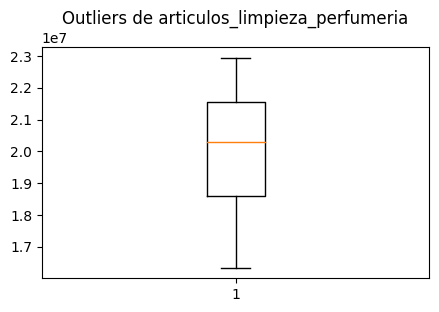

In [90]:
#se usa el df clean en el que se aplico el metodo IQR
fig=plt.figure(figsize=(5,3))
plt.boxplot(df_clean_iqr_perfumeria['articulos_limpieza_perfumeria'])
plt.title('Outliers de articulos_limpieza_perfumeria')
plt.show()

In [91]:
df_clean_iqr_perfumeria.to_csv('articulos_limpieza_perfumeria.csv')

from google.colab import files
files.download('articulos_limpieza_perfumeria.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## electronicos_articulos_hogar

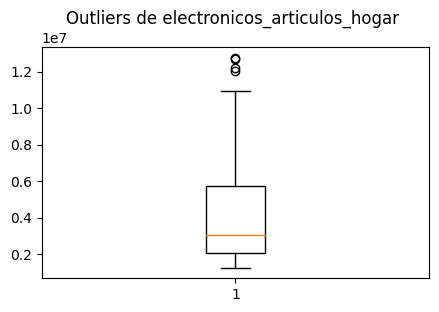

In [28]:
fig=plt.figure(figsize=(5,3))
plt.boxplot(df['electronicos_articulos_hogar'])
plt.title('Outliers de electronicos_articulos_hogar ')
plt.show()

In [99]:
#metodo IQR
y =df['electronicos_articulos_hogar']

percentile25=y.quantile(.25)   #Q1
percentile75=y.quantile(.75)   #Q3
iqr= percentile75-percentile25

Limite_superior_iqr = percentile75 +1.5*iqr
Limite_inferior_iqr = percentile25 +1.5*iqr

print('El limite superior permitido es:' ,Limite_superior_iqr)
print('El limite inferior permitido es:' ,Limite_inferior_iqr)

outliers_iqr_electricos= df[(y>Limite_superior_iqr)|(y<Limite_inferior_iqr)]
outliers_iqr_electricos
df_clean_iqr_electricos=df[(y<=Limite_superior_iqr)&(y>=Limite_inferior_iqr)]  #convierte valores extremos en nulos


El limite superior permitido es: 11203501.416500002
El limite inferior permitido es: 7545089.692500001


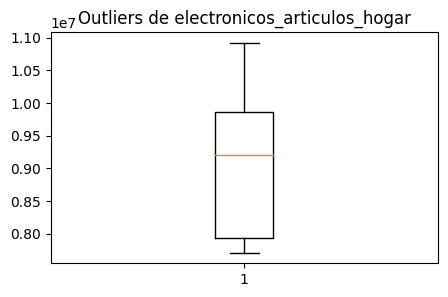

In [100]:
#se usa el df clean en el que se aplico el metodo IQR
fig=plt.figure(figsize=(5,3))
plt.boxplot(df_clean_iqr_electricos['electronicos_articulos_hogar'])
plt.title('Outliers de electronicos_articulos_hogar')
plt.show()

In [101]:
df_clean_iqr_electricos.to_csv('electronicos_articulos_hogar.csv')

from google.colab import files
files.download('electronicos_articulos_hogar.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>